# 声明：内容为学习笔记，仅供学习交流

# LightBGM应用

In [1]:
import datetime
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 加载数据集
breast = load_breast_cancer()
# 获取特征值和目标指
X,y = breast.data,breast.target
# 获取特征名称
feature_name = breast.feature_names

In [3]:
# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
# 数据格式转换
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [5]:
# 参数设置
boost_round = 50 # 迭代次数              
early_stop_rounds = 10 # 验证数据若在early_stop_rounds轮中未提高，则提前停止

params = {
    'boosting_type': 'gbdt',  # 设置提升类型
    'objective': 'regression',  # 目标函数
    'metric': {'l2', 'auc'},  # 评估函数
    'num_leaves': 31,  # 叶子节点数
    'learning_rate': 0.05,  # 学习速率
    'feature_fraction': 0.9,  # 建树的特征选择比例
    'bagging_fraction': 0.8,  # 建树的样本采样比例
    'bagging_freq': 5,  # k 意味着每 k 次迭代执行bagging
    'verbose': 1  # <0 显示致命的, =0 显示错误 (警告), >0 显示信息
}

In [6]:
# 模型训练:加入提前停止的功能
results = {}
gbm = lgb.train(params,
                lgb_train,
                num_boost_round= boost_round,
                valid_sets=(lgb_eval, lgb_train),
                valid_names=('validate','train'),
                early_stopping_rounds = early_stop_rounds,
                evals_result= results)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.092235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] Start training from score 0.637363
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	train's l2: 0.21292	train's auc: 0.984943	validate's l2: 0.225636	validate's auc: 0.98825
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	train's l2: 0.196278	train's auc: 0.990805	validate's l2: 0.208124	validate's auc: 0.992855
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	train's l2: 0.181505	train's auc: 0.990324	validate's l2: 0.192562	validate's auc: 0.992379
[LightGBM] [Warning] 

In [7]:
# 模型预测
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred

array([0.54984511, 0.68507681, 0.70000118, 0.68750003, 0.69502618,
       0.70463823, 0.7000488 , 0.69978645, 0.69007681, 0.70470519,
       0.64551823, 0.69250003, 0.70485027, 0.61261276, 0.63319082,
       0.53038232, 0.68207978, 0.5187003 , 0.51890028, 0.51888203,
       0.51837969, 0.51864926, 0.68207978, 0.69975614, 0.53038232,
       0.70478228, 0.70468615, 0.56786527, 0.70478228, 0.51914877,
       0.70000118, 0.53038232, 0.69613365, 0.57771345, 0.70468615,
       0.54997235, 0.70485945, 0.57745777, 0.69250003, 0.51832519,
       0.61261276, 0.70464844, 0.61261276, 0.70468615, 0.6715068 ,
       0.51895598, 0.70468615, 0.6901846 , 0.69976298, 0.51914491,
       0.51890028, 0.53639985, 0.55928785, 0.70462336, 0.70480834,
       0.7046495 , 0.6901846 , 0.69007681, 0.68507681, 0.51877305,
       0.56786527, 0.5210285 , 0.70464844, 0.70462336, 0.51890028,
       0.69505181, 0.51902873, 0.51914491, 0.52117121, 0.69505181,
       0.58880187, 0.51901768, 0.70463823, 0.67131372, 0.53038

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: More than one metric available, picking one to plot.
  


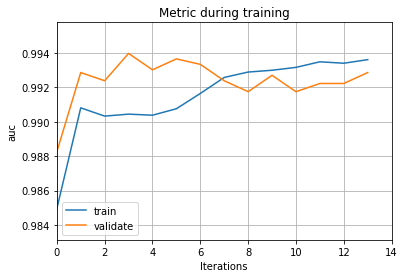

In [8]:
# 模型评估
lgb.plot_metric(results)
plt.show()

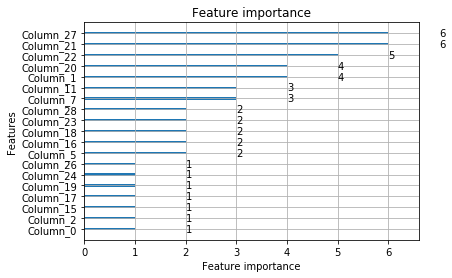

In [9]:
# 绘制重要的特征
lgb.plot_importance(gbm,importance_type = "split")
plt.show()